In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import copy
import time
import os

import sys
sys.path.append('../../')

from data.processing import get_data

import models
import random

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new, forecast_top_k_trials
from main.seir.sensitivity import calculate_sensitivity_and_plot
import main.seir.uncertainty as uncertainty_module
from utils.generic.create_report import save_dict_and_create_report_simple
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml

In [34]:
config_path = 'experiments' 
config_filenames = ['undetected_testing.yaml', 'undetected.yaml', 'seirhd.yaml']

undetected_testing.yaml
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_26102020_tracker.pkl
{'start_date': None, 'end_date': datetime.date(2020, 6, 25), 'train_period': 21, 'val_period': 7, 'test_period': 0, 'split_after_rolling': True}
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 77                  | 78                  | 79                  | 80                  | 81                  |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-06-14 00:00:00 | 2020-06-15 00:00:00 | 2020-06-16 00:00:00 | 2020-06-17 00:00:00 | 2020-06-18 00:00:00 |
| state       | Delhi               | Delhi               | Delhi               | Delhi               | Delhi               |
| district    | Delhi               | Delhi               | Delhi       

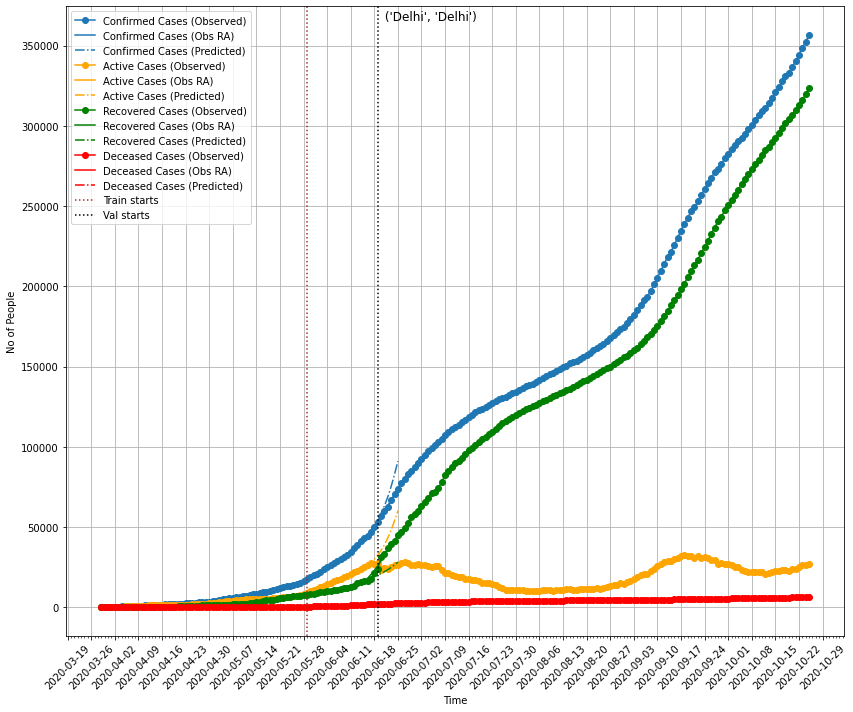

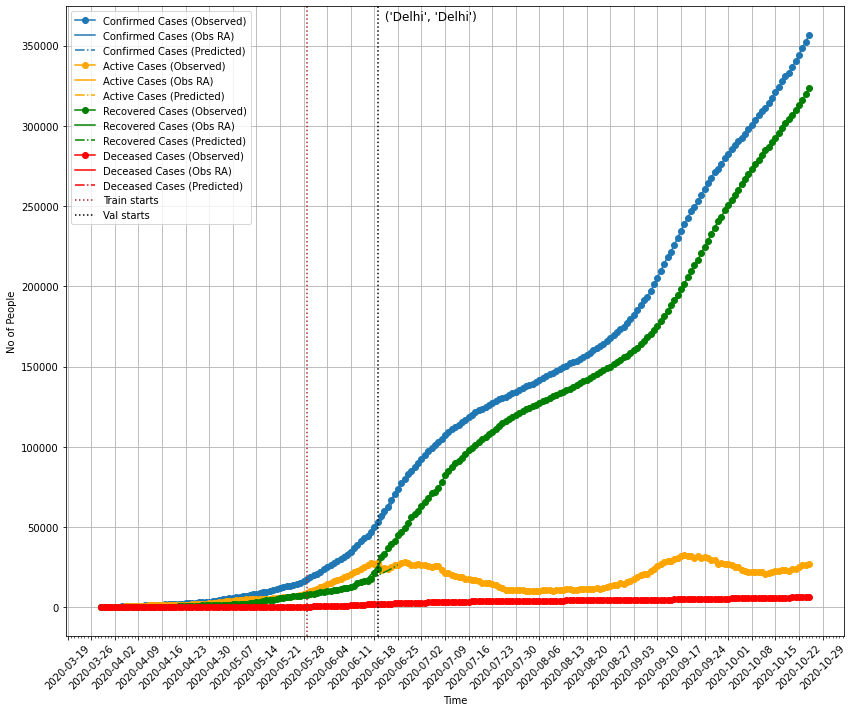

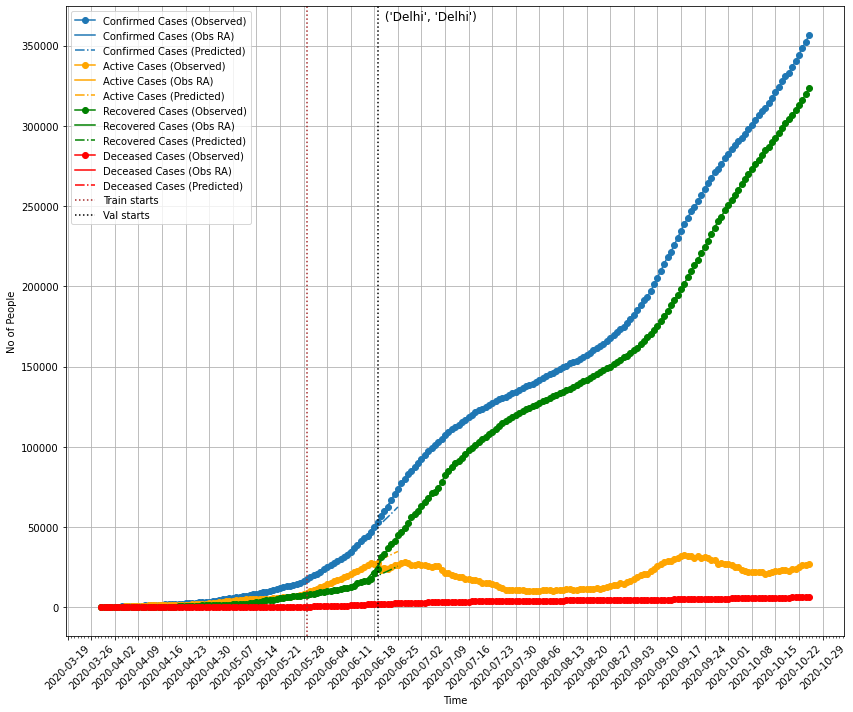

In [35]:
predictions = []
losses = []
for config_filename in config_filenames:
    print (config_filename)
    config = read_config(os.path.join(config_path, config_filename))
    predictions_dict = {}
    predictions_dict['m1'] = single_fitting_cycle(**copy.deepcopy(config['fitting'])) 
    predictions.append(predictions_dict)
    losses.append(predictions_dict['m1']['df_loss'])

In [36]:
pd.concat(losses, axis=1, keys=['undetected_testing', 'undetected', 'seirhd'])

undetected_testing          undetected            seirhd         
                       train      val      train      val    train      val
total                1.29768   10.586    1.99447  3.91571  1.50905   10.788
active               2.53253  75.7482    2.61484  41.2121   1.7518  25.7296
recovered            3.32337  32.5365    2.92147  34.3991  2.78215  35.3381
deceased             4.12221  7.14703    5.55809  5.24501  5.22338  16.1611